In [1]:
#importing libraries and data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
#Drop ID Column
data = data.drop('ID',axis = 1)
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.shape

(5000, 13)

In [4]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [7]:
#Replacing negative values from work experience column with 0 because work experience can never be negative

data['Experience'].replace([x for x in data['Experience'] if x<0],0,inplace=True)
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


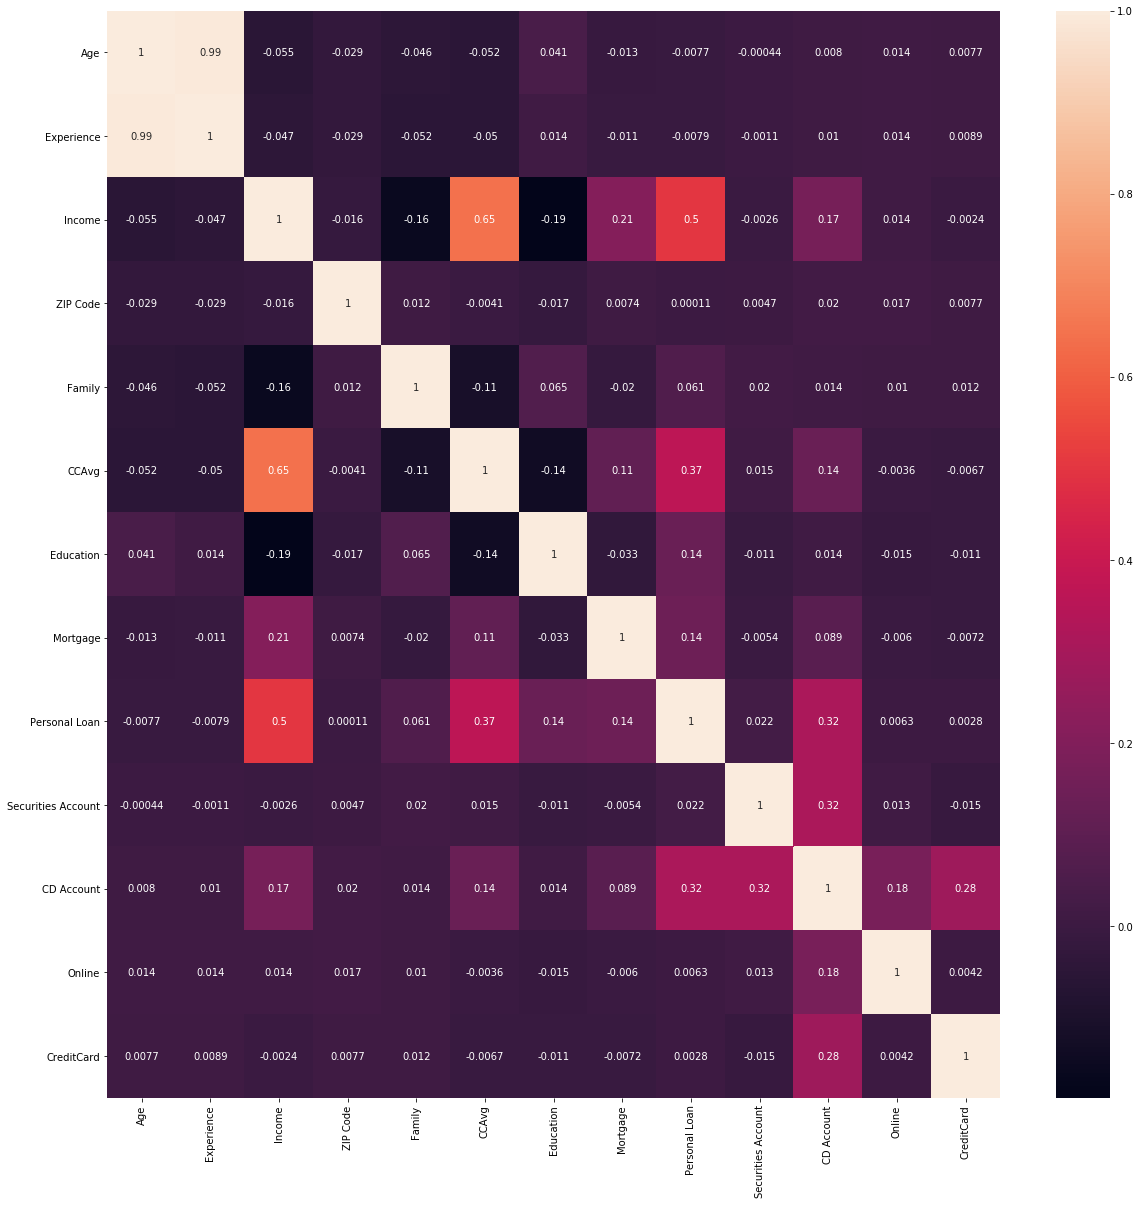

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

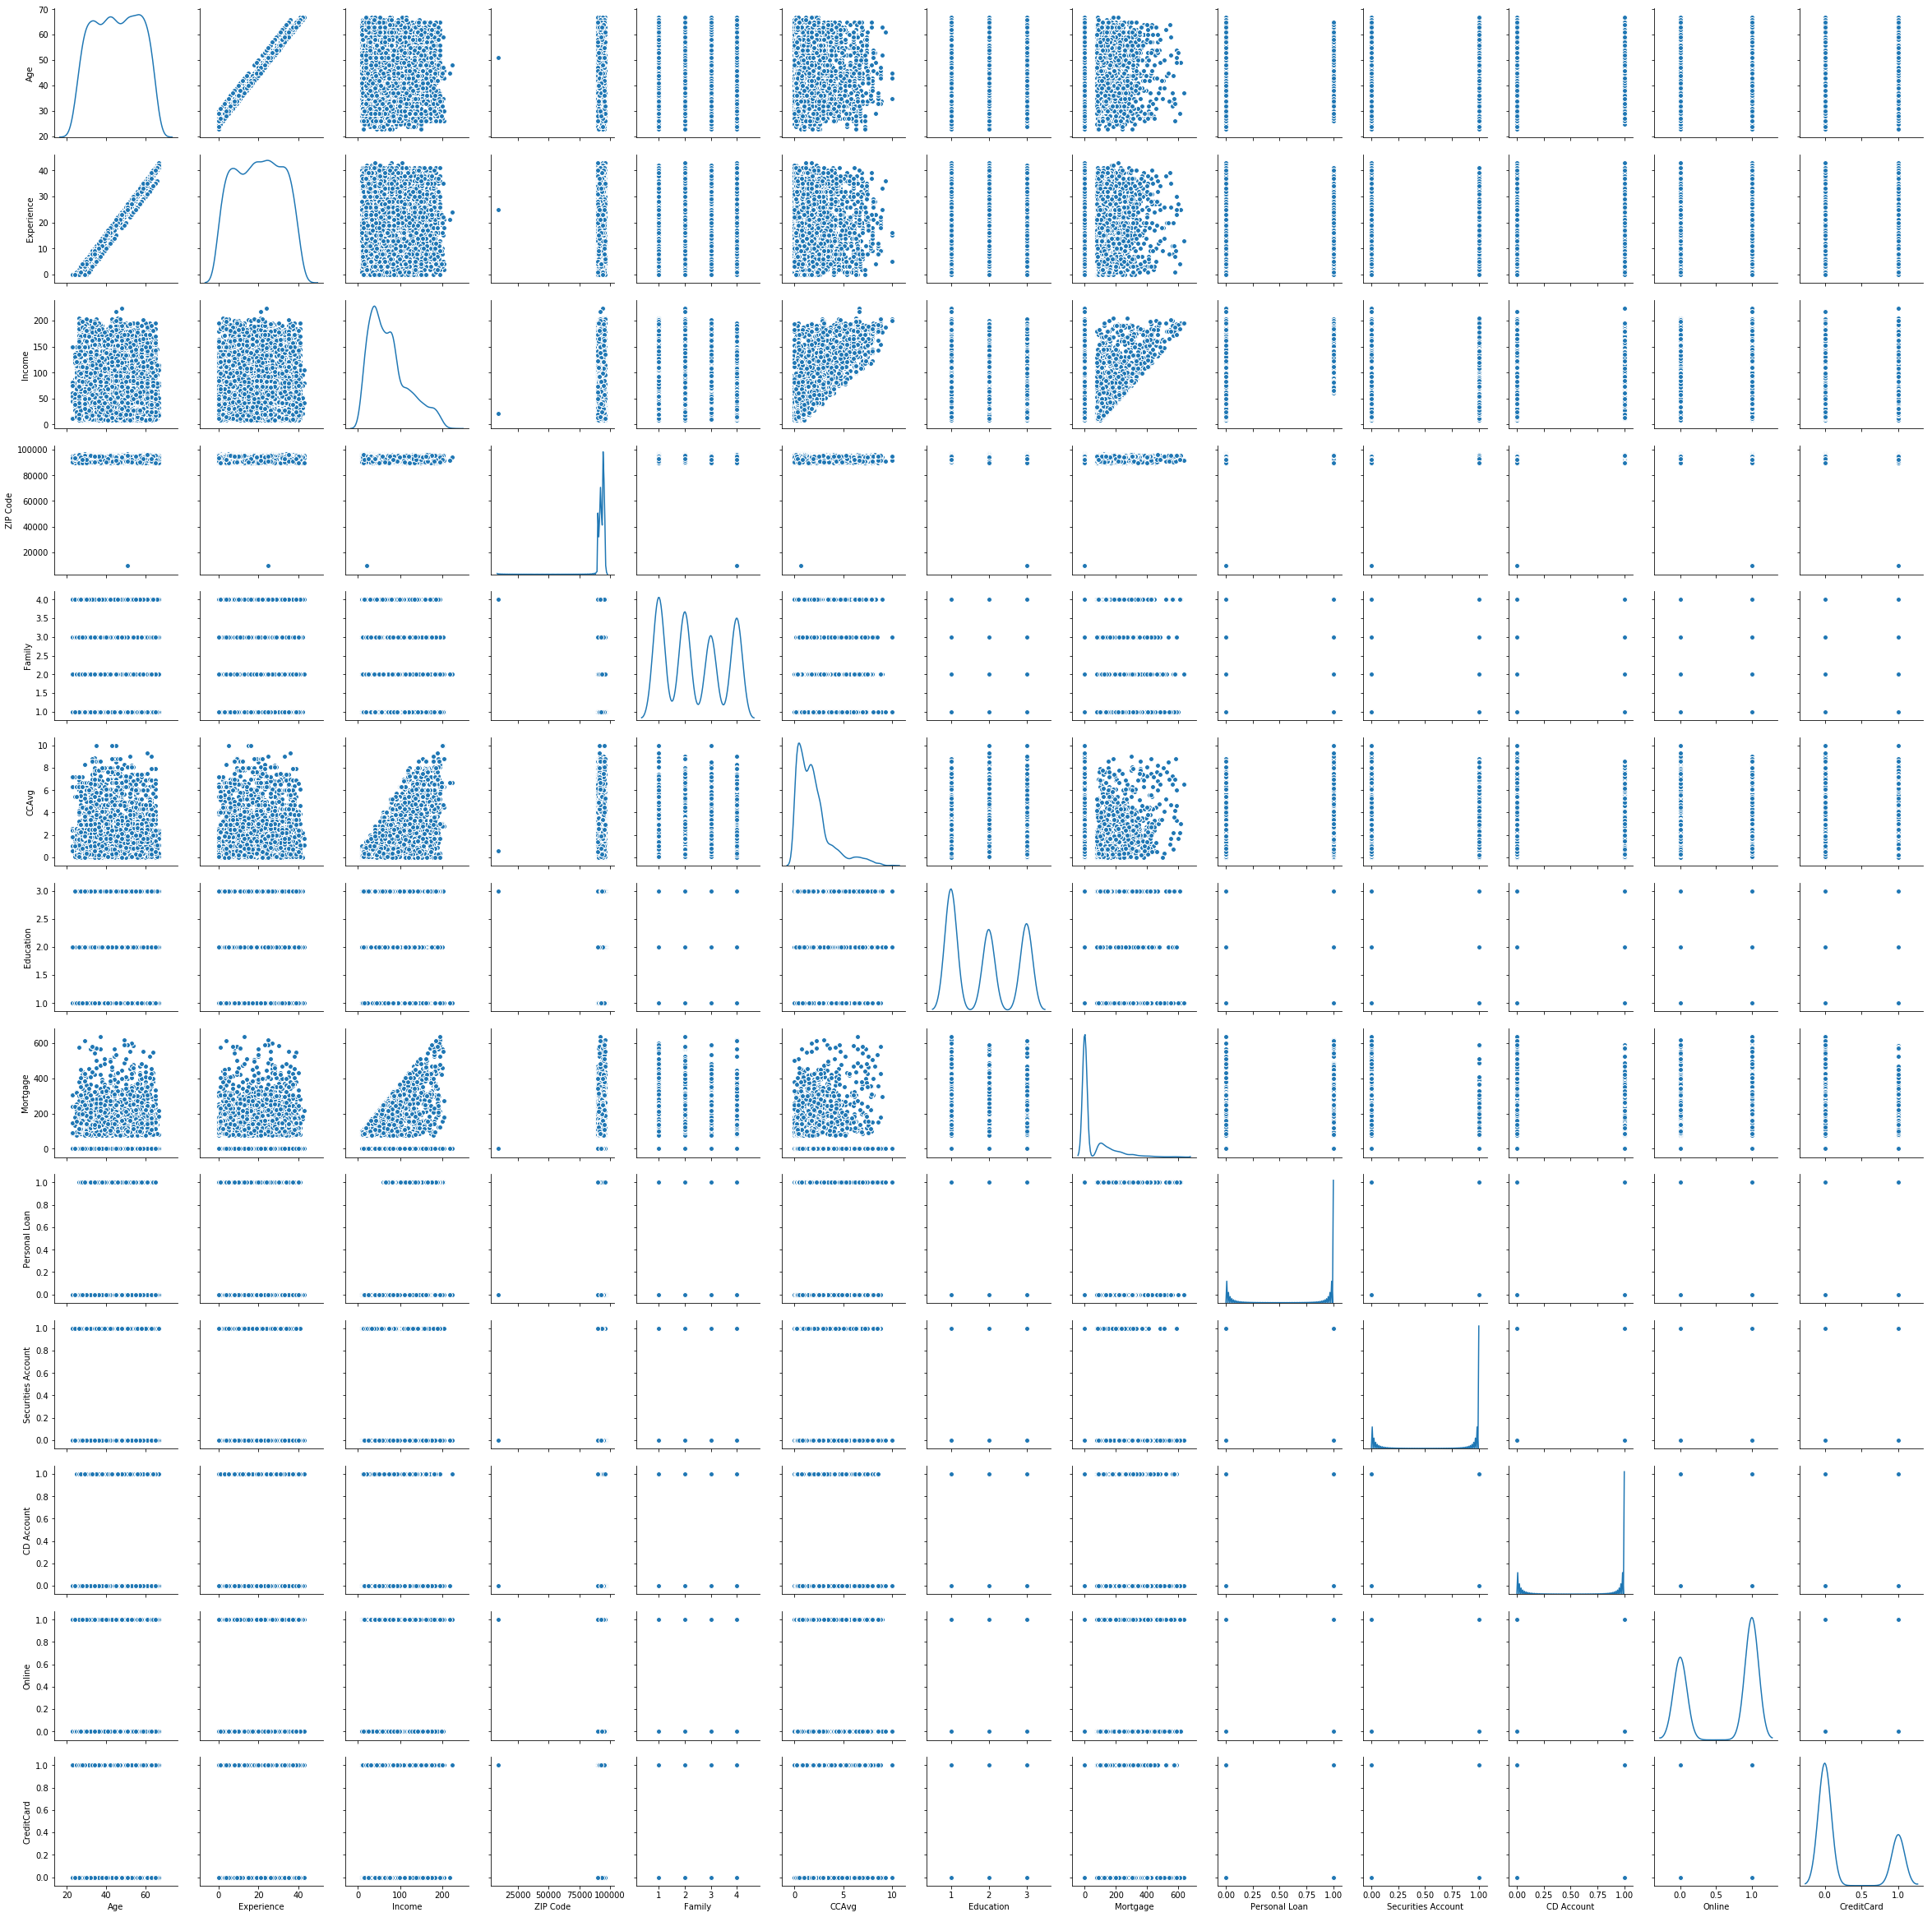

In [9]:
sns.pairplot(data, diag_kind = 'kde')

My findings

1. Mortgage has a very high standard deviation
2. Mortgage has very different mean and median values
3. Age and work experience are highly corelated (0.99)
4. Avg. spending(CCAvg) is fairly corelated to income (0.65)
5. Income is right skewed

### Get the target column distribution

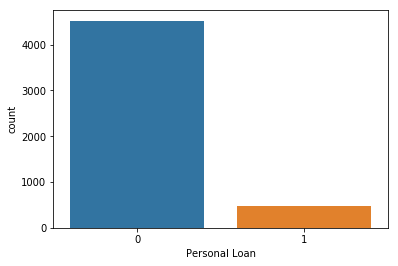

In [10]:
sns.countplot(data['Personal Loan'])

In [11]:
data.groupby('Personal Loan').size()

Personal Loan
0    4520
1     480
dtype: int64

In [12]:
data.groupby('Personal Loan').mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.148894,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [13]:
X = data.loc[:,data.columns!='Personal Loan'] 
y = data['Personal Loan']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [15]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [17]:
cm = confusion_matrix(y_test,y_pred)

AxesSubplot(0.125,0.125;0.62x0.755)


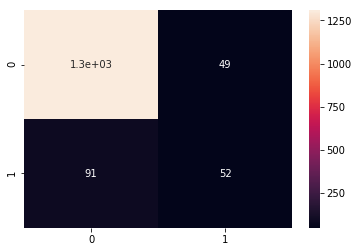

In [18]:
print(sns.heatmap(cm,annot=True))

In [19]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.96      0.95      1357\n           1       0.51      0.36      0.43       143\n\n    accuracy                           0.91      1500\n   macro avg       0.72      0.66      0.69      1500\nweighted avg       0.89      0.91      0.90      1500\n'

In [20]:
print('Accuracy: ',round((accuracy_score(y_test,y_pred)*100),2))

Accuracy:  90.67
